<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# A simplistic approach to time series modeling

---


<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-simplistic-approach-to-time-series-modeling" data-toc-modified-id="A-simplistic-approach-to-time-series-modeling-1">A simplistic approach to time series modeling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-the-stock-data" data-toc-modified-id="Load-the-stock-data-1.0.1">Load the stock data</a></span><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.0.1.1">Load the data</a></span></li><li><span><a href="#Sort-the-rows-by-Date-in-ascending-order" data-toc-modified-id="Sort-the-rows-by-Date-in-ascending-order-1.0.1.2">Sort the rows by <code>Date</code> in ascending order</a></span></li></ul></li><li><span><a href="#Make-the-Date-column-the-index-of-the-DataFrame." data-toc-modified-id="Make-the-Date-column-the-index-of-the-DataFrame.-1.0.2">Make the <code>Date</code> column the index of the DataFrame.</a></span></li><li><span><a href="#Predicting-price-developments" data-toc-modified-id="Predicting-price-developments-1.0.3">Predicting price developments</a></span><ul class="toc-item"><li><span><a href="#Create-the-data-frame" data-toc-modified-id="Create-the-data-frame-1.0.3.1">Create the data frame</a></span></li><li><span><a href="#Drop-missing-values" data-toc-modified-id="Drop-missing-values-1.0.3.2">Drop missing values</a></span></li><li><span><a href="#Look-at-correlations-between-the-variables" data-toc-modified-id="Look-at-correlations-between-the-variables-1.0.3.3">Look at correlations between the variables</a></span></li><li><span><a href="#Extract-the-outcome-variable" data-toc-modified-id="Extract-the-outcome-variable-1.0.3.4">Extract the outcome variable</a></span></li><li><span><a href="#Create-a-train-test" data-toc-modified-id="Create-a-train-test-1.0.3.5">Create a train-test</a></span></li><li><span><a href="#Fit-a-linear-regression-model-and-evaluate-it-on-the-train-and-test-set." data-toc-modified-id="Fit-a-linear-regression-model-and-evaluate-it-on-the-train-and-test-set.-1.0.3.6">Fit a linear regression model and evaluate it on the train and test set.</a></span></li><li><span><a href="#Obtain-the-prediction-for-the-train-and-test-set-and-plot-them-together-with-the-true-values." data-toc-modified-id="Obtain-the-prediction-for-the-train-and-test-set-and-plot-them-together-with-the-true-values.-1.0.3.7">Obtain the prediction for the train and test set and plot them together with the true values.</a></span></li><li><span><a href="#Fit-a-random-forest-model-instead.-Does-that-lead-to-an-improvement?" data-toc-modified-id="Fit-a-random-forest-model-instead.-Does-that-lead-to-an-improvement?-1.0.3.8">Fit a random forest model instead. Does that lead to an improvement?</a></span></li></ul></li><li><span><a href="#Fit-a-linear-regression-model-taking-additionally-the-prices-of-the-day-before-yesterday-as-predictors-into-account." data-toc-modified-id="Fit-a-linear-regression-model-taking-additionally-the-prices-of-the-day-before-yesterday-as-predictors-into-account.-1.0.4">Fit a linear regression model taking additionally the prices of the day before yesterday as predictors into account.</a></span></li><li><span><a href="#Fitting-a-classification-model" data-toc-modified-id="Fitting-a-classification-model-1.0.5">Fitting a classification model</a></span><ul class="toc-item"><li><span><a href="#Predict-rise-or-drop-with-yesterday's-close-price-and-today's-open-price." data-toc-modified-id="Predict-rise-or-drop-with-yesterday's-close-price-and-today's-open-price.-1.0.5.1">Predict rise or drop with yesterday's close price and today's open price.</a></span></li><li><span><a href="#Determine-the-baseline-for-the-model" data-toc-modified-id="Determine-the-baseline-for-the-model-1.0.5.2">Determine the baseline for the model</a></span></li><li><span><a href="#Create-a-train-test-split" data-toc-modified-id="Create-a-train-test-split-1.0.5.3">Create a train-test split</a></span></li><li><span><a href="#Fit-and-evaluate-a-logistic-regression-model." data-toc-modified-id="Fit-and-evaluate-a-logistic-regression-model.-1.0.5.4">Fit and evaluate a logistic regression model.</a></span></li><li><span><a href="#Fit-and-evaluate-a-random-forest-classifier." data-toc-modified-id="Fit-and-evaluate-a-random-forest-classifier.-1.0.5.5">Fit and evaluate a random forest classifier.</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Load the stock data

Which one you choose is up to you!

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

#### Load the data

In [2]:
df = pd.read_csv('./datasets/aapl.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


#### Sort the rows by `Date` in ascending order

In [3]:
df = df.sort_values("Date")

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Volume
250,2016-01-19,98.41,98.65,95.50,96.66,52841349
249,2016-01-20,95.10,98.19,93.42,96.79,72008265
248,2016-01-21,97.06,97.88,94.94,96.30,52054521
247,2016-01-22,98.63,101.46,98.37,101.42,65562769
246,2016-01-25,101.52,101.53,99.21,99.44,51196375
245,2016-01-26,99.93,100.88,98.07,99.99,63538305
244,2016-01-27,96.04,96.63,93.34,93.42,132224500
243,2016-01-28,93.79,94.52,92.39,94.09,55557109
242,2016-01-29,94.79,97.34,94.35,97.34,64010141
241,2016-02-01,96.47,96.71,95.40,96.43,40571593


### Make the `Date` column the index of the DataFrame.

Making the index a datetime allows us to easily order the data by time. Doing this will result in dataframe objects indexed by DateTime - literally Time Series!

In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df.set_index("Date",drop=True,inplace=True)

In [7]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,98.41,98.65,95.50,96.66,52841349
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-25,101.52,101.53,99.21,99.44,51196375


In [8]:
df.index.name=None

In [9]:
df.head()

,Open,High,Low,Close,Volume
2016-01-19,98.41,98.65,95.50,96.66,52841349
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-25,101.52,101.53,99.21,99.44,51196375


### Predicting price developments

Let's create a simple predictive model for time series.
- As the outcome variable we take today's Close price. 
- As predictors we use yesterday's Close price and today's Open price. 

#### Create the data frame

Use `.shift()` to create a column containing yesterday's prices.

In [10]:
df["yes_close"]=df.Close.shift()

In [11]:
df.head()

,Open,High,Low,Close,Volume,yes_close
2016-01-19,98.41,98.65,95.50,96.66,52841349,NaN
2016-01-20,95.10,98.19,93.42,96.79,72008265,96.66
2016-01-21,97.06,97.88,94.94,96.30,52054521,96.79
2016-01-22,98.63,101.46,98.37,101.42,65562769,96.30
2016-01-25,101.52,101.53,99.21,99.44,51196375,101.42


#### Drop missing values

In [12]:
df.dropna(inplace=True)

In [13]:
df.head()

,Open,High,Low,Close,Volume,yes_close
2016-01-20,95.10,98.19,93.42,96.79,72008265,96.66
2016-01-21,97.06,97.88,94.94,96.30,52054521,96.79
2016-01-22,98.63,101.46,98.37,101.42,65562769,96.30
2016-01-25,101.52,101.53,99.21,99.44,51196375,101.42
2016-01-26,99.93,100.88,98.07,99.99,63538305,99.44


#### Look at correlations between the variables

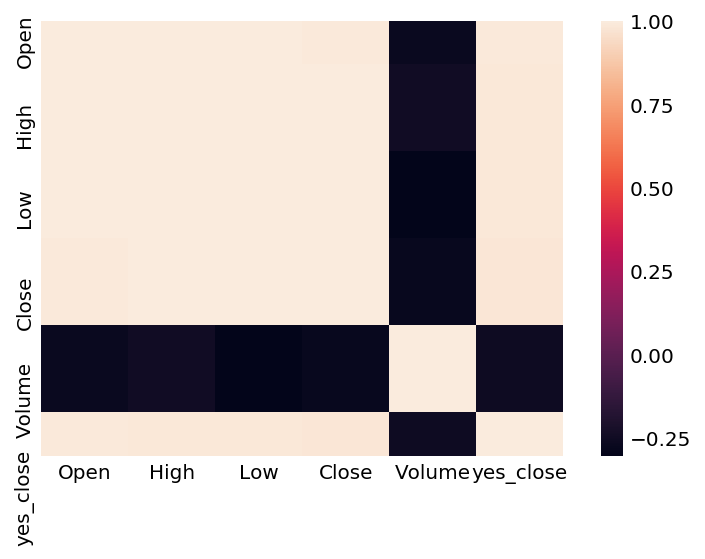

In [14]:
cor = df.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map


In [15]:
#sns.pairplot(df)
#plt.show()


#### Extract the outcome variable

In [16]:
y =df["Close"]

In [17]:
X = df[["yes_close","Open"]]

In [21]:
df.shape

(250, 6)

#### Create a train-test

Make sure to split in the order of the dates.

In [22]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score


In [31]:
X_train.shape


(200, 6)

In [32]:
X_train = df.iloc[:200,:]
X_test = df.iloc[:50,:]
y_train = df.iloc[:200,:]
y_test = df.iloc[:50,:]

#### Fit a linear regression model and evaluate it on the train and test set.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))


1.0
1.0
1.0


In [40]:
predictions_train  =  model.predict(X_train)
predictions_test = model.predict(X_test)

#### Obtain the prediction for the train and test set and plot them together with the true values.

<Figure size 864x2160 with 0 Axes>

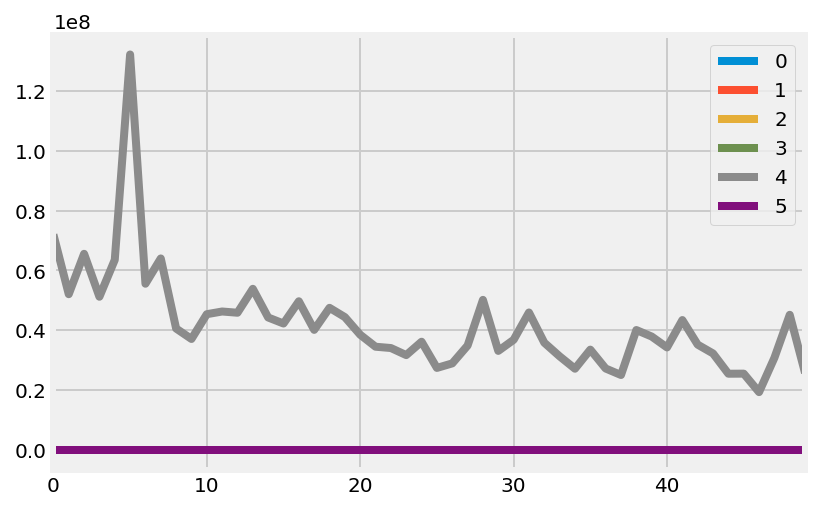

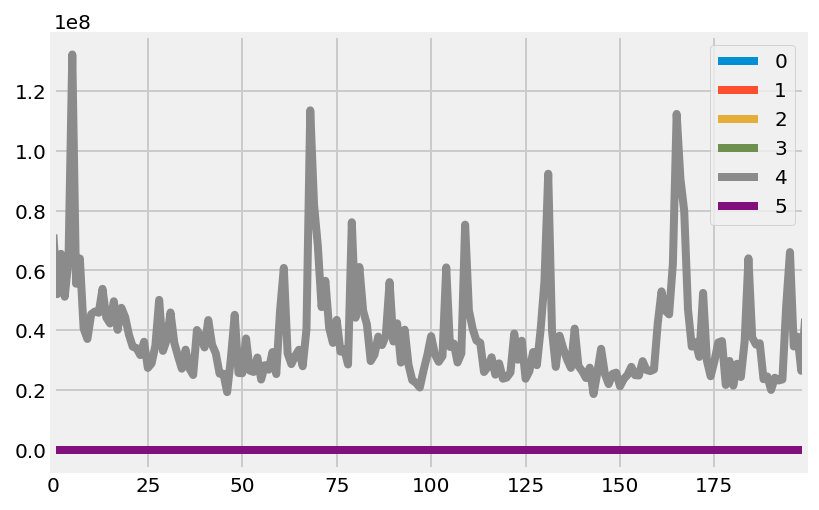

In [46]:
plt.figure(figsize=(12, 30))
pd.DataFrame(predictions_test).plot(label='test',legend=True)
pd.DataFrame(predictions_train).plot(label='train',legend=True)
plt.show()

#### Fit a random forest model instead. Does that lead to an improvement?

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(random_state=1, n_estimators=100)

In [53]:
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(cross_val_score(rf, X_train, y_train, cv=5).mean())
print(rf.score(X_test, y_test))

0.9987438295771973
0.9868099020520555
0.9966415495061594


### Fit a linear regression model taking additionally the prices of the day before yesterday as predictors into account.

### Fitting a classification model

Create a binary variable which indicates for consecutive days if the closing price rose or dropped.

#### Predict rise or drop with yesterday's close price and today's open price.

#### Determine the baseline for the model

#### Create a train-test split

#### Fit and evaluate a logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression

#### Fit and evaluate a random forest classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier